In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels

In [2]:
aapl = yf.Ticker("AAPL")

In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


## Remove five dates from data frame (including open, close, high, low, volume and adj close) 

In [7]:
df = data.copy()

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df.index, size=5, replace=False)

In [11]:
#missing_dates
missing_dates = sorted(missing_dates)

In [12]:
df.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume']] = np.nan

In [13]:
df.loc[missing_dates]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800.0
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300.0
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    float64
dtypes: float64(6)
memory usage: 21.8 KB


In [16]:
imputed_indices = df[df['Adj Close'].isnull()].index

For random_state=3241, our missing_dates are '2023-01-09', '2023-09-12',  '2023-04-00', '2023-01-20'   '2023-04-0. Let's zoom in for better views.']

## Last Observation Carried Forward (LOCF)

In [17]:
from sklearn.metrics import mean_squared_error

mses = {}

In [18]:
df_imputed_LOCF = df.copy()
data.info()
df_imputed_LOCF['Adj Close'] = df_imputed_LOCF['Adj Close'].ffill()

#df_imputed_LOCF.info()

mses['LOCF'] = mean_squared_error(data.loc[missing_dates,'Adj Close'], df_imputed_LOCF.loc[missing_dates,'Adj Close'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.8 KB


In [19]:
mses

{'LOCF': 3.952299280511215}

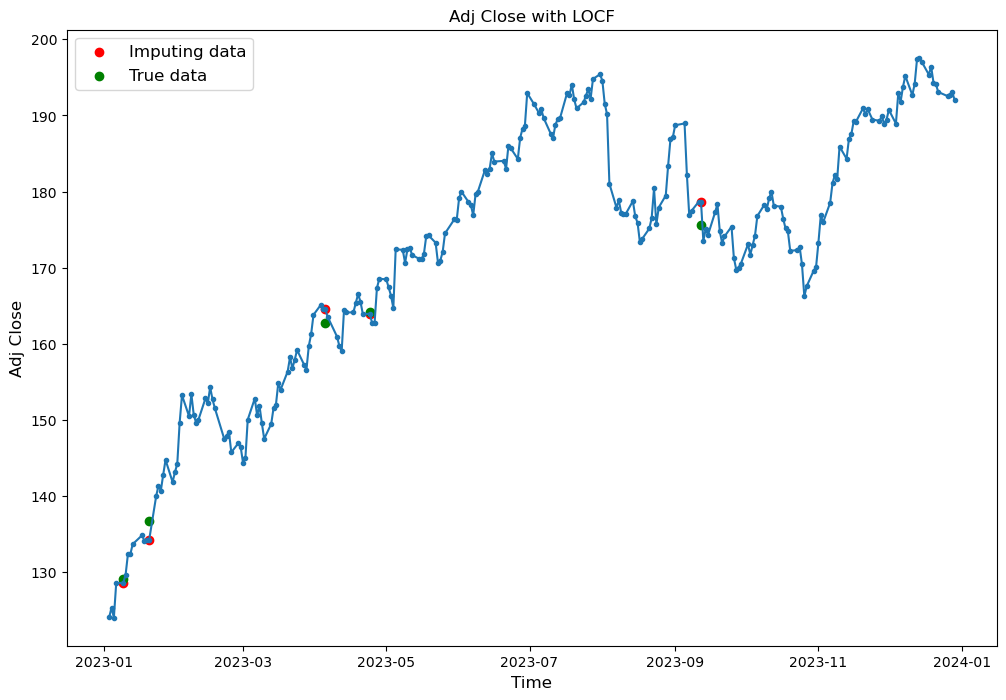

In [20]:
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df_imputed_LOCF['Adj Close'],'.-')

# Add points where data was imputed with red color

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices, df_imputed_LOCF.loc[imputed_indices, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices, data.loc[imputed_indices, 'Adj Close'], color='green',label='True data')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with LOCF')

plt.legend(fontsize=12)

plt.show()

## Next Observation Carried Backward (NOCB)

In [21]:
df_imputed_NOCB = df.copy()

df_imputed_NOCB['Adj Close'] = df_imputed_NOCB['Adj Close'].bfill()

mses['NOCB'] = mean_squared_error(data.loc[missing_dates,'Adj Close'], df_imputed_NOCB.loc[missing_dates,'Adj Close'])

df_imputed_NOCB.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0
2023-01-09,NaN,NaN,NaN,NaN,129.661789,NaN
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661789,63896200.0
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.399246,69458900.0
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.319901,71379600.0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.658859,57809700.0


In [22]:
mses

{'LOCF': 3.952299280511215, 'NOCB': 3.638419683324173}

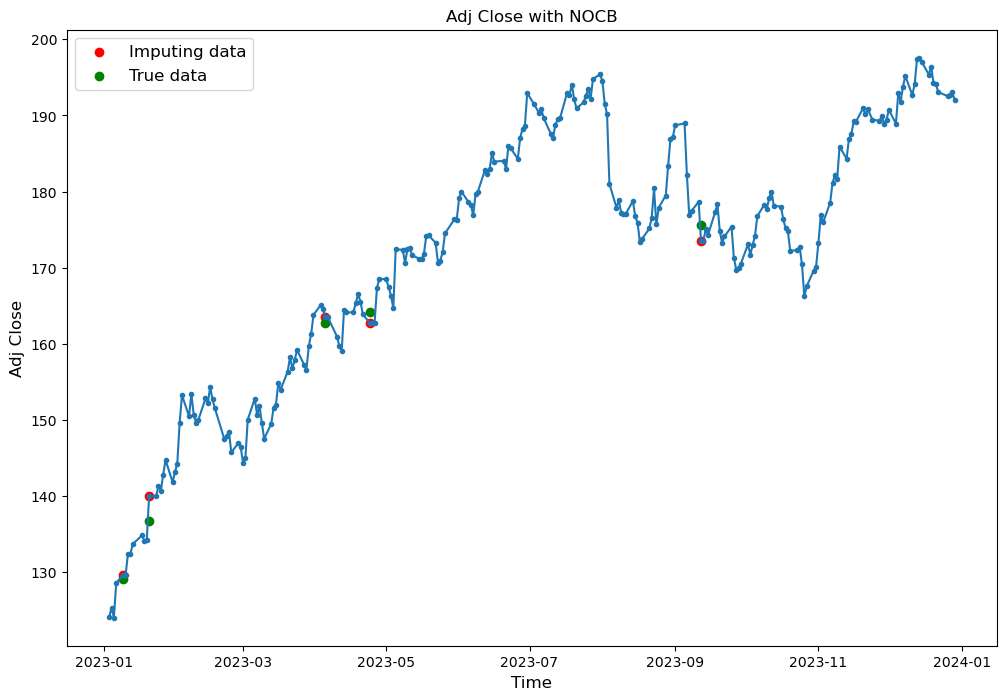

In [23]:
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df_imputed_NOCB['Adj Close'],'.-')

# Add points where data was imputed with red color

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices, df_imputed_NOCB.loc[imputed_indices, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices, data.loc[imputed_indices, 'Adj Close'], color='green',label='True data')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with NOCB')

plt.legend(fontsize=12)

plt.show()

## Linear interpolation step-by-step

Step 1: Make a copy of df_remove. We will fill out missing data in the imputed data frame.

In [24]:
df_imputed = df.copy()

Step 2: Apply Linear Interpolating on df_remove. Method can be 'linear' or 'spline'

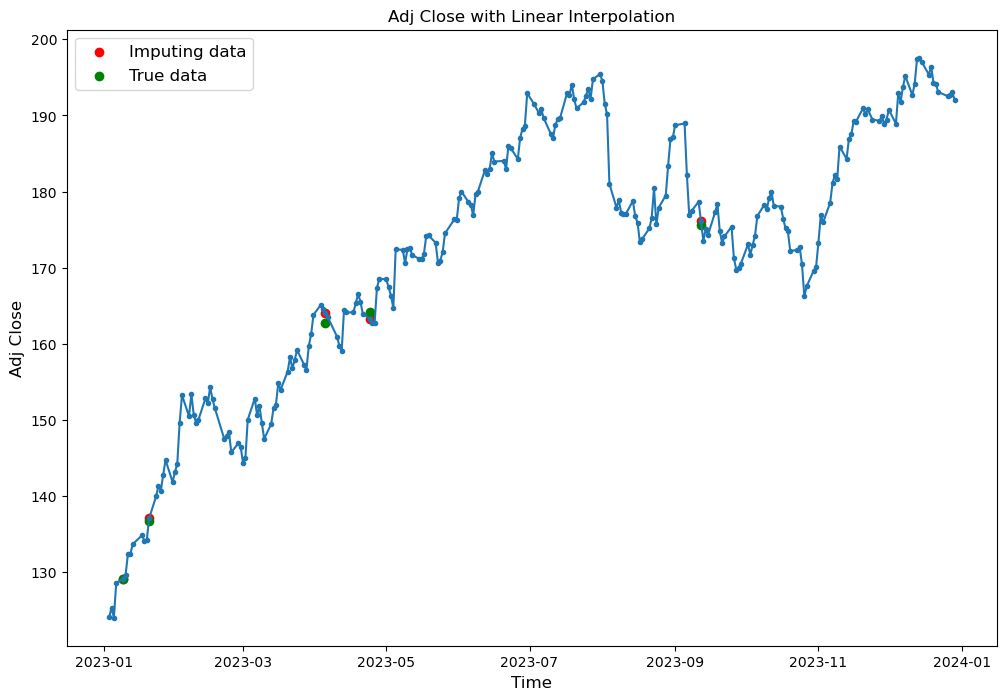

In [25]:
df_imputed['Adj Close'] = df_imputed['Adj Close'].interpolate(method ='linear', limit_direction ='forward')

# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df_imputed['Adj Close'],'.-')

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices, df_imputed.loc[imputed_indices, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices, data.loc[imputed_indices, 'Adj Close'], color='green',label='True data')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with Linear Interpolation')

plt.legend(fontsize=12)

plt.show()

In [26]:
mses['linear_interpolating'] = mean_squared_error(df_imputed.loc[imputed_indices, 'Adj Close'],data.loc[imputed_indices, 'Adj Close'])

In [27]:
mses

{'LOCF': 3.952299280511215,
 'NOCB': 3.638419683324173,
 'linear_interpolating': 0.618039699550718}

## Spline interpolating

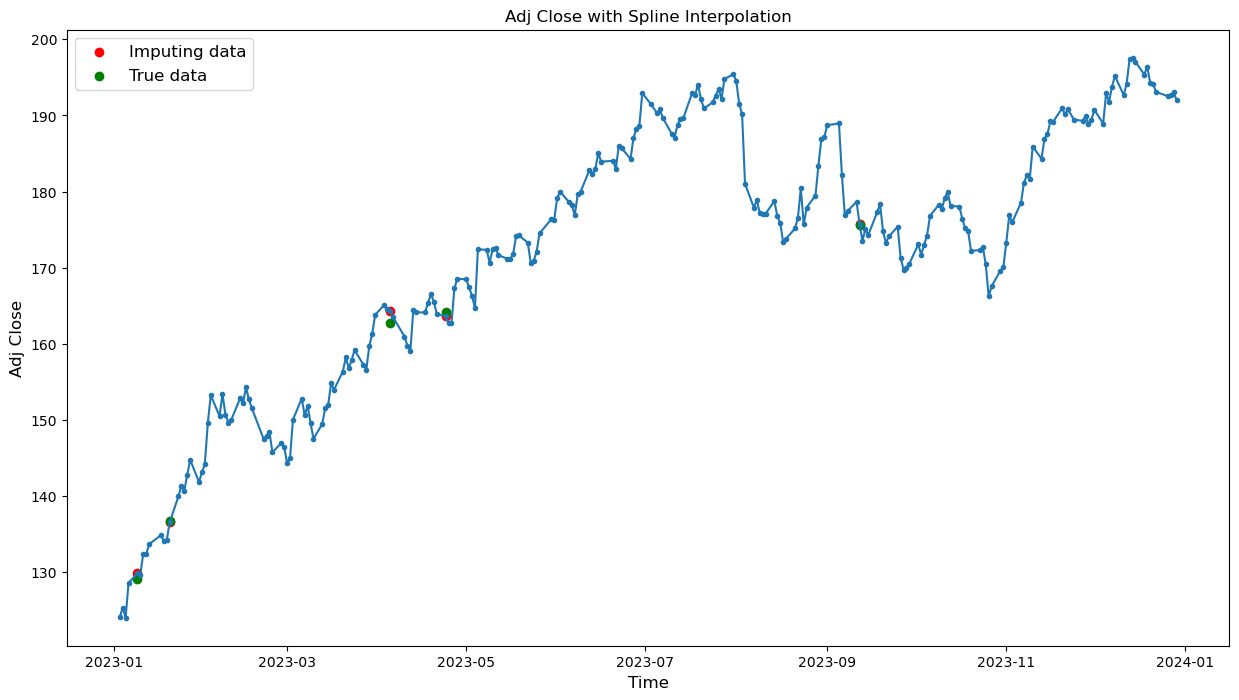

In [55]:
df_imputed_spline = df.copy()
df_imputed_spline['Adj Close'] = df_imputed_spline['Adj Close'].interpolate(method ='spline', limit_direction ='forward',order=2)

# Plot the main line with markers
plt.figure(figsize=(15,8))
plt.plot(df_imputed_spline['Adj Close'],'.-')

# Add points where data was imputed with red color
#imputed_indices = df[df['Adj Close'].isnull()].index

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices, df_imputed_spline.loc[imputed_indices, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices,data.loc[imputed_indices,'Adj Close'], color='green', label='True data')

plt.legend(fontsize=12)
# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with Spline Interpolation')


#plt.xlim(datetime(2023, 1, 1),datetime(2023, 1, 25))
#plt.ylim(120, 150)

plt.show()

#print(mean_squared_error(data.loc[imputed_indices, 'Adj Close'],df_imputed_spline.loc[imputed_indices,'Adj Close']))
#print(df_imputed_spline.loc[imputed_indices,'Adj Close'])

In [53]:
## Find optimal order for spline interpolating

orders = range(2,6)
mse_spline = np.zeros(len(orders))
for i, ords in enumerate(orders):
    df_spline = df.copy()
    df_spline['Adj Close'] = df_spline['Adj Close'].interpolate(method ='spline', limit_direction ='forward', order=ords)
    mse_spline[i] = mean_squared_error(data.loc[imputed_indices, 'Adj Close'],df_spline.loc[imputed_indices,'Adj Close'])

In [54]:
mse_spline

array([0.76958179, 2.0513711 , 1.81224114, 2.4989614 ])

In [31]:
imputed_indices

DatetimeIndex(['2023-01-09', '2023-01-20', '2023-04-05', '2023-04-24',
               '2023-09-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [56]:
mses['spline'] = mean_squared_error(df_imputed_spline.loc[imputed_indices, 'Adj Close'],data.loc[imputed_indices, 'Adj Close'])

In [57]:
mses

{'LOCF': 3.952299280511215,
 'NOCB': 3.638419683324173,
 'linear_interpolating': 0.618039699550718,
 'cubic_interpolating': 1.2357778798491807,
 'spline': 0.7695817857734998}

## Removing five consecutive data

In [34]:
## df2: remove an interval
df2 = data.copy()
df2.info()
random_state=21
np.random.seed(random_state)
k = np.random.randint(0,len(data))
print(k)
for i in range(k, k+5):  # A 15-day gap
    df2.iloc[i] = np.nan

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.8 KB
201
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    float64
dtypes: float64(6)
memory usage: 21.8 KB


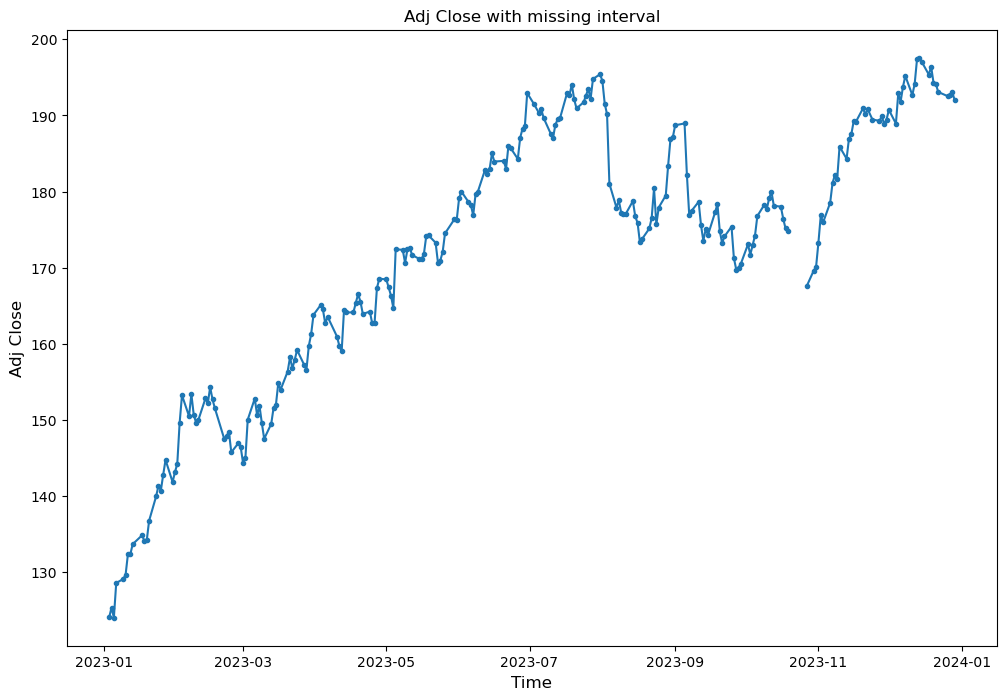

In [35]:
## Plot
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df2['Adj Close'],'.-')


# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with missing interval')

plt.show()

In [58]:
imputed_indices_2 = df2[df2['Adj Close'].isnull()].index

## Rolling Statistics Imputation

In [59]:
df2_imputed_rolling = df2.copy()
df2_imputed_rolling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    float64
dtypes: float64(6)
memory usage: 21.8 KB


In [38]:
#df2_imputed_rolling['Adj Close']=df2_imputed_rolling['Adj Close'].fillna(df2_imputed_rolling['Adj Close'].rolling(window=5, min_periods=1).mean().shift(1))

In [64]:
val_rolling = df2_imputed_rolling['Adj Close'].rolling(window=8, min_periods=5).mean().shift(1)

In [65]:
df2_imputed_rolling['Adj Close']=df2_imputed_rolling['Adj Close'].fillna(value=val_rolling)

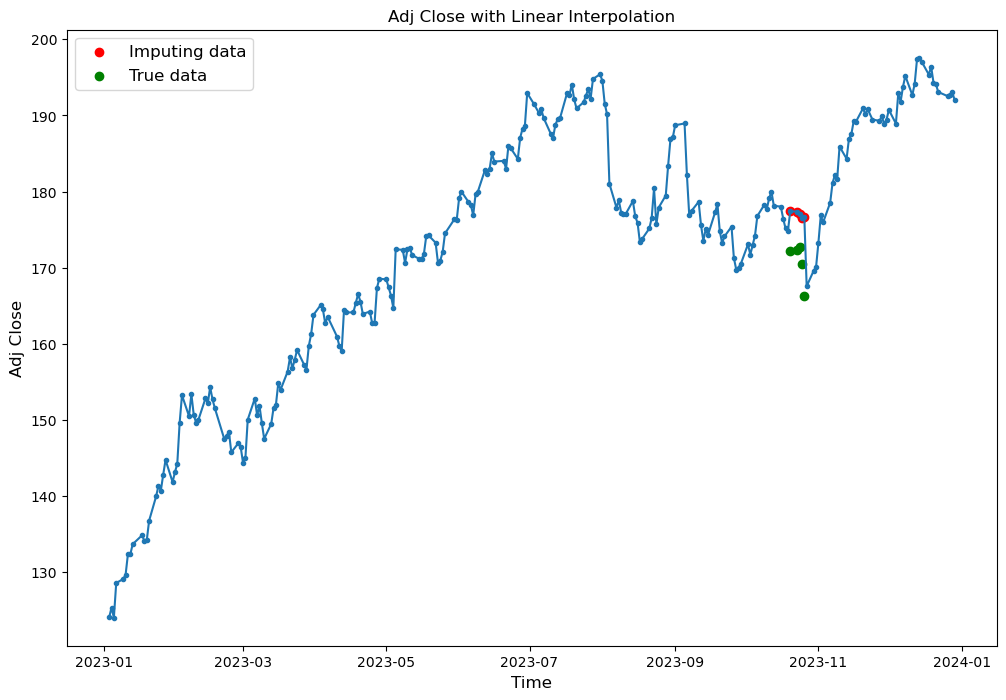

In [66]:
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(df2_imputed_rolling['Adj Close'],'.-')

#plt.figure(figsize=(16,5))
plt.scatter(imputed_indices_2, df2_imputed_rolling.loc[imputed_indices_2, 'Adj Close'], color='red', label='Imputing data')
plt.scatter(imputed_indices_2, data.loc[imputed_indices_2, 'Adj Close'], color='green',label='True data')

# Set labels
plt.xlabel('Time', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close with Linear Interpolation')

plt.legend(fontsize=12)

plt.show()

In [67]:
mses['Rolling Average'] = mean_squared_error(data.loc[imputed_indices_2, 'Adj Close'],df2_imputed_rolling.loc[imputed_indices_2, 'Adj Close'])

In [68]:
mses

{'LOCF': 3.952299280511215,
 'NOCB': 3.638419683324173,
 'linear_interpolating': 0.618039699550718,
 'cubic_interpolating': 1.2357778798491807,
 'spline': 0.7695817857734998,
 'Rolling Average': 43.17403863259166}

In [84]:
## Test different window size
ws = range(1,10)
mps = range(1,10)
mse_rolling_test = 100*np.ones((len(mps),len(ws)))

for i, mp in enumerate(mps):
    for j, w in enumerate(ws):
        if w>=mp:
            df2_rolling_test = df2.copy()
            val_rolling = df2_imputed_rolling['Adj Close'].rolling(window=w, min_periods=mp).mean().shift(1)
            df2_rolling_test['Adj Close']=(df2_rolling_test['Adj Close'].fillna(value=val_rolling))
            mse_rolling_test[i,j] = mean_squared_error(data.loc[imputed_indices_2, 'Adj Close'],df2_rolling_test.loc[imputed_indices_2, 'Adj Close'])
    

In [85]:
mse_rolling_test

array([[ 40.76137445,  40.25258275,  39.91371543,  39.38190506,
         38.0503946 ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        ,  40.25258275,  39.91371543,  39.38190506,
         38.0503946 ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        , 100.        ,  39.91371543,  39.38190506,
         38.0503946 ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        , 100.        , 100.        ,  39.38190506,
         38.0503946 ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        , 100.        , 100.        , 100.        ,
         38.0503946 ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        , 100.        , 100.        , 100.        ,
        100.        ,  39.07239892,  41.4908474 ,  44.05167048,
         46.36265977],
       [100.        , 100.        , 100.        , 100.        ,
        100.        , 100.    

In [88]:
np.unravel_index(mse_rolling_test.argmin(), mse_rolling_test.shape)

(0, 4)

In [89]:
row, col = np.unravel_index(mse_rolling_test.argmin(), mse_rolling_test.shape)

In [90]:
print("The optimal min_perid =", mps[row], 'and optimal window size is', ws[col])

The optimal min_perid = 1 and optimal window size is 5


In [100]:
mses

{'LOCF': 3.952299280511215,
 'NOCB': 3.638419683324173,
 'linear_interpolating': 0.618039699550718,
 'cubic_interpolating': 1.2357778798491807,
 'spline': 0.7695817857734998,
 'Rolling Average': 43.17403863259166}

## Cross-sectional analysis between APPL and ITW

In [91]:
## Import ITW (Illinois Tool Works)

itw = yf.Ticker("ITW")

In [92]:
data_ITW = pdr.get_data_yahoo("ITW", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [93]:
data_ITW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


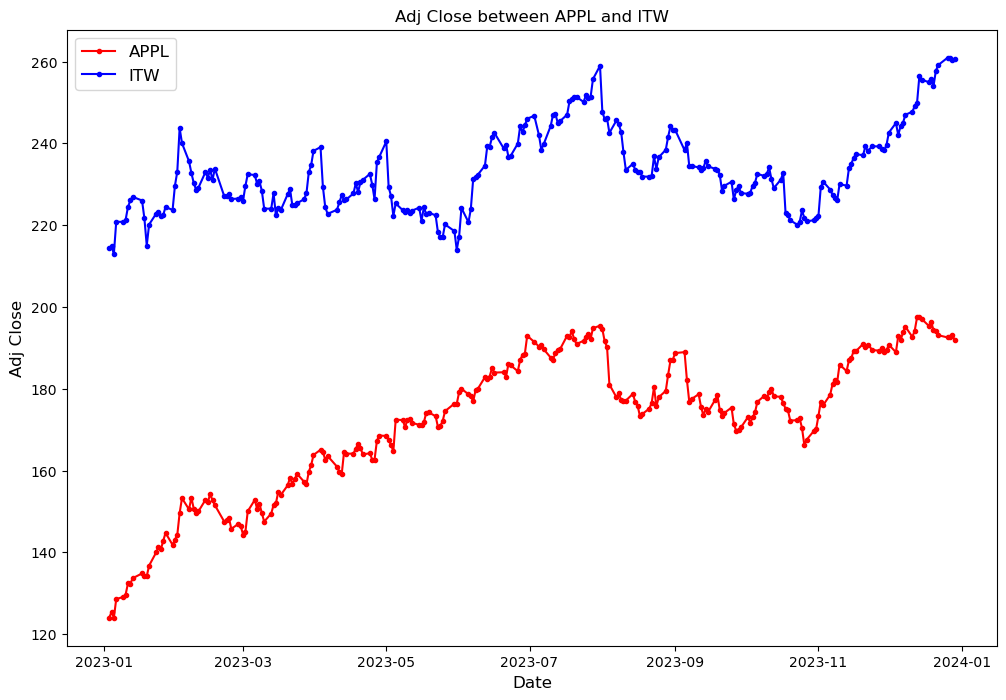

In [94]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_ITW['Adj Close'],'.-',color='blue',label='ITW')

# Set labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close between APPL and ITW')

plt.legend(fontsize=12)
plt.show()

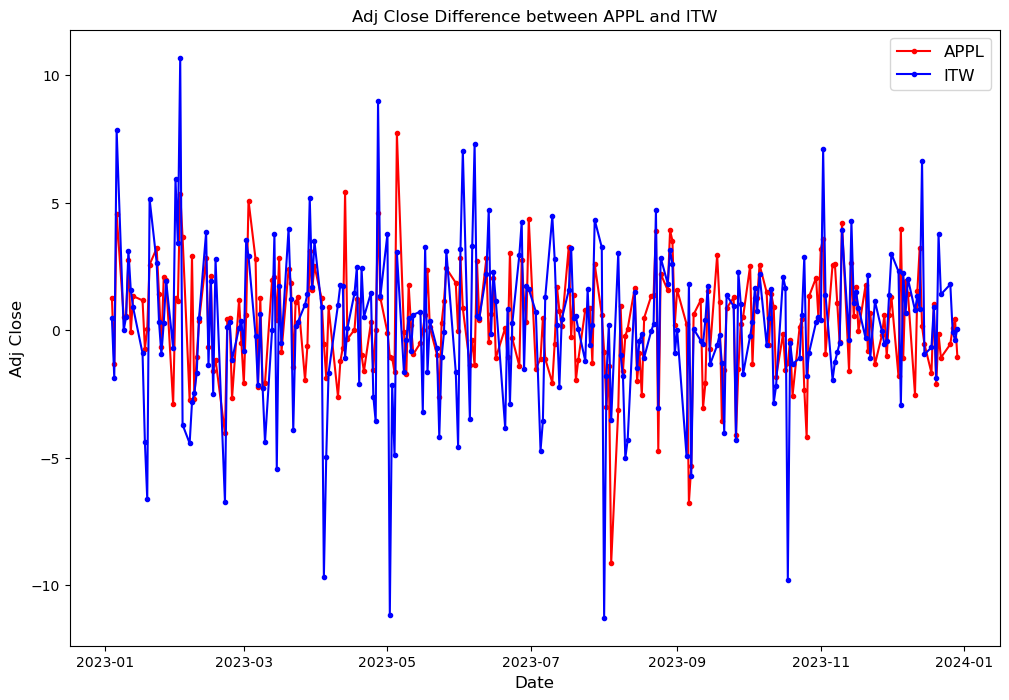

In [95]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'].diff(),'.-',color='red',label='APPL')
plt.plot(data_ITW['Adj Close'].diff(),'.-',color='blue',label='ITW')

# Set labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close Difference between APPL and ITW')

plt.legend(fontsize=12)
plt.show()

## Granger Causality

In [101]:
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

In [113]:
df_GC = data.copy()
df_GC['ITW Adj Close'] = data_ITW['Adj Close']
df_GC

,Open,High,Low,Close,Adj Close,Volume,ITW Adj Close
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,214.357849
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,214.844315
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700,212.956818
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,220.808426
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,220.818146
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,259.145569
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,260.946381
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,260.886993


In [114]:
#res = grangercausalitytests([data['Adj Close'],data_ITW['Adj Close']],maxlag=15)

#df_GC = data['Adj Close'].copy()

res = grangercausalitytests(df_GC[['Adj Close', 'ITW Adj Close']], maxlag=15)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5158  , p=0.4733  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5221  , p=0.4700  , df=1
likelihood ratio test: chi2=0.5215  , p=0.4702  , df=1
parameter F test:         F=0.5158  , p=0.4733  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3170  , p=0.2699  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=2.6881  , p=0.2608  , df=2
likelihood ratio test: chi2=2.6737  , p=0.2627  , df=2
parameter F test:         F=1.3170  , p=0.2699  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9183  , p=0.1272  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=5.9227  , p=0.1154  , df=3
likelihood ratio test: chi2=5.8528  , p=0.1190  , df=3
parameter F test:         F=1.9183  , p=0.1272  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4416  , p=0.0093  

In [104]:
data[['Adj Close', 'Open']]

,Adj Close,Open
Date,,
2023-01-03,124.048050,130.279999
2023-01-04,125.327507,126.889999
2023-01-05,123.998451,127.129997
2023-01-06,128.560867,126.010002
2023-01-09,129.086533,130.470001
...,...,...
2023-12-22,193.091385,195.179993
2023-12-26,192.542816,193.610001
2023-12-27,192.642548,192.490005


In [105]:
[data['Adj Close'], data_ITW['Adj Close']]

[Date
 2023-01-03    124.048050
 2023-01-04    125.327507
 2023-01-05    123.998451
 2023-01-06    128.560867
 2023-01-09    129.086533
                  ...    
 2023-12-22    193.091385
 2023-12-26    192.542816
 2023-12-27    192.642548
 2023-12-28    193.071426
 2023-12-29    192.024185
 Name: Adj Close, Length: 250, dtype: float64,
 Date
 2023-01-03    214.357849
 2023-01-04    214.844315
 2023-01-05    212.956818
 2023-01-06    220.808426
 2023-01-09    220.818146
                  ...    
 2023-12-22    259.145569
 2023-12-26    260.946381
 2023-12-27    260.886993
 2023-12-28    260.499023
 2023-12-29    260.558716
 Name: Adj Close, Length: 250, dtype: float64]